# (5주차) 10월6일 
> qqplot, lambda, map, 애드워드 터프티, 찰스미나드의 도표

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상 

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-xeLEuZpNP1dp_ILoCnRz6b


`-` (1/9) 공지사항

`-` (2/9) qqplot 

`-` (3/9) 정규분포, t분포 qqplot 비교 

`-` (4/9) 분위수를 구하는 다양한 방법 

`-` (5/9) lambda 

`-` (6/9) map (1) 

`-` (7/9) map (2) 

`-` (8/9) 에드워드 터프티, 찰스미나드의 도표. 

`-` (9/9) 과제설명 


### 예제 (qqplot): 

`-` 히스토그램이나 박스플랏보다 분포를 특정하기에 좋은 시각화는 없을까? 

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
from scipy import stats

In [18]:
np.random.seed(43052) 
x=np.random.normal(size=1000,loc=2,scale=1.5) 
y=stats.t.rvs(df=10,size=1000)/np.sqrt(10/8)*1.5 + 2 

`-` 우리가 관측한 $x_1,\dots,x_{1000}$이 $N(2,1.5^2)$에서 나온 샘플인지 궁금하다. 

`-` 아이디어

(1) 관측한 값을 순서대로 나열하여 $x_{(1)},x_{(2)}, \dots, x_{(1000)}$을 만든다. 

In [20]:
x[:2]

array([2.57513073, 3.62626175])

- $x_1=2.57513073,\quad x_2=3.62626175$

In [21]:
x.sort()

In [22]:
x[:2]

array([-2.44398446, -2.14071467])

- $x_{(1)}= -2.44398446,\quad x_{(2)}=-2.14071467$

(2) 파이썬이나 R로 $N(2,1.5^2)$에서 1000개의 정규분포를 생성. 그리고 순서대로 나열하여 $\tilde{x}_{(1)},\tilde{x}_{(2)}, \dots, \tilde{x}_{(1000)}$를 만든다. 

(3) $x_{(1)}\approx \tilde{x}_{(1)}, \dots , x_{(1000)}\approx \tilde{x}_{(1000)}$ 이면 x는 정규분포일것 

`-` 그런데 $\tilde{x}_{(1)},\tilde{x}_{(2)}, \dots, \tilde{x}_{(1000)}$은 시뮬레이션을 할때마다 다른값이 나올테니까 불안정한 느낌이 든다. $\to$ 이론적인 값을 계산하자. 

In [25]:
xx = (x-np.mean(x)) / np.std(x,ddof=1) 
xx[:2]

array([-3.05569305, -2.84275629])

- 실제우리가 관측한값

In [28]:
print(stats.norm.ppf(0.001))
print(stats.norm.ppf(0.002))

-3.090232306167813
-2.878161739095483


- 이론적인 값

`-` 분위수

In [29]:
m=[i/1000 for i in np.arange(1000)+1] 

In [34]:
q=[]
for i in range(len(m)):
    q=q+[stats.norm.ppf(m[i])]    

In [36]:
q[:2]

[-3.090232306167813, -2.878161739095483]

`-` $xx \approx q$ 을 확인하기 위해서 $(q,q)$그래프와 $(q,xx)$의 그래프를 그려서 겹쳐보자. 

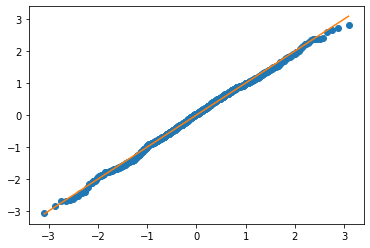

In [43]:
plt.plot(q,xx,'o')
plt.plot(q,q,'-')

- 해석: 점들이 주황색선 근처에 모여있을수록 정규분포에 가깝다. 

`-` 아래와 같이 쉽게 그릴수도 있다. (우리가 그린그림과 조금 다르게 보인다)

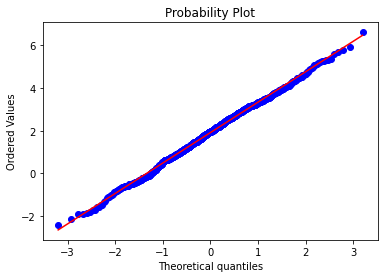

In [45]:
_ = stats.probplot(x,plot=plt)

- 자세히보면 조금 다르게 그려지긴 하는데 이는 $m=(\frac{1}{1000},\dots,\frac{999}{1000},\frac{1000}{1000})$와 같이 계산하지 않고 약간 보정한값을 계산하기 때문임 
- stats.probplot? 을 통하여 확인한 결과 아래와 같은 코드로 구현됨
```python
### 보정하는방법1 
n=len(xx)
m=[((i+1)-0.3175)/(n+0.365) for i in range(n)]
m[-n]=0.5**(1/n)
m[0]=1-m[-n]
```
- 프로그램에 따라서 아래와 같이 보정하는 경우도 있음
```python
### 보정하는방법2
m=[(i-3/8)/(n+1/4) for i in np.arange(1000)+1]
```
- 또 자세히보면 stats.probplot은 y축에 표준화전의 x값이 있음을 알 수 있음. 

`-` 정규분포와 t분포의 qqplot을 그려서 비교해보자. 

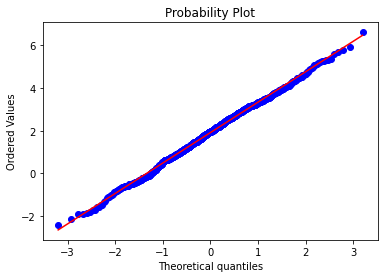

In [47]:
_ = stats.probplot(x,plot=plt) # 정규분포 

- 정규분포 

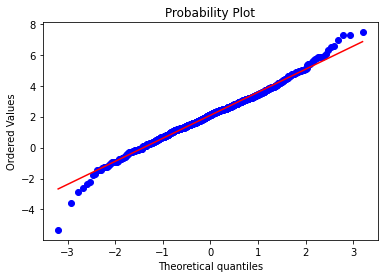

In [48]:
_ = stats.probplot(y,plot=plt) # t분포 

- t분포: 푸른점들이 대체로 붉은선위에 놓여있는듯 하지만 양끝단에서는 그렇지 않다. (중앙부근은 정규분포와 비슷하지만, 꼬리부분은 정규분포와 확실히 다르다) 
- 왼쪽꼬리: 이론적으로 나와야 할 값보다 더 작은값이 실제로 관측됨 
- 오른쪽꼬리: 이론적으로 나와야 할 값보다 더 큰값이 실제로 관측됨 
- 해석: 이 분포는 정규분포보다 두꺼운 꼬리를 가진다. 

`-` 서브플랏팅: 두 분포를 양옆에 나란히 비교하고 싶음 

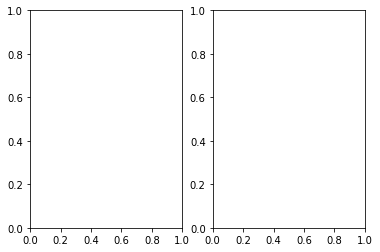

In [50]:
fig , (ax1,ax2) = plt.subplots(1,2)

In [51]:
_ = stats.probplot(x,plot=ax1) 
_ = stats.probplot(y,plot=ax2) 

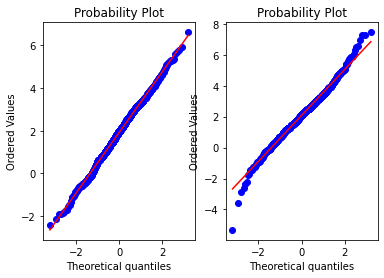

In [52]:
fig

In [53]:
fig.set_figwidth(8)

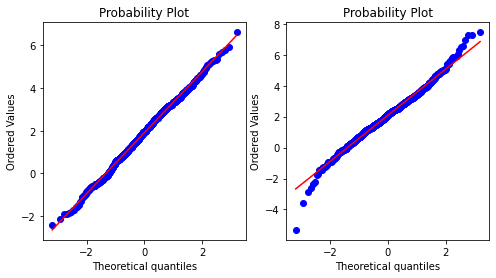

In [54]:
fig

In [55]:
ax1.set_title('normal dist') 
ax2.set_title('t dist') 

Text(0.5, 1.0, 't dist')

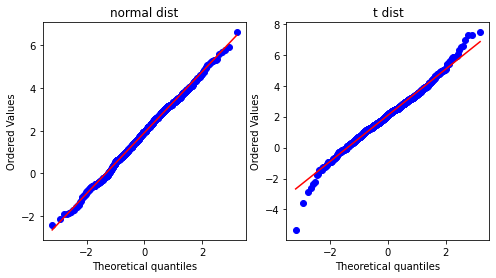

In [56]:
fig

### 예제4 (boxplot, histrogram, qqplot)


`-` 박스플랏, 히스토그램, qqplot을 그려보자. 

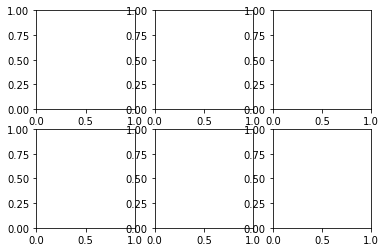

In [57]:
fig, ax =plt.subplots(2,3)

In [59]:
(ax1,ax2,ax3), (ax4,ax5,ax6) = ax 

In [63]:
sns.boxplot(x,ax=ax1)
sns.histplot(x,kde=True,ax=ax2)
_ = stats.probplot(x,plot=ax3)
sns.boxplot(y,ax=ax4)
sns.histplot(y,kde=True,ax=ax5)
_ = stats.probplot(y,plot=ax6)

/home/cgb3/anaconda3/envs/dv2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/cgb3/anaconda3/envs/dv2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


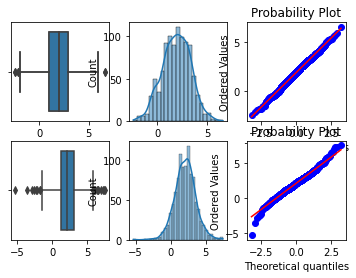

In [64]:
fig

In [67]:
fig.set_figwidth(10)
fig.set_figheight(8)
fig.tight_layout()

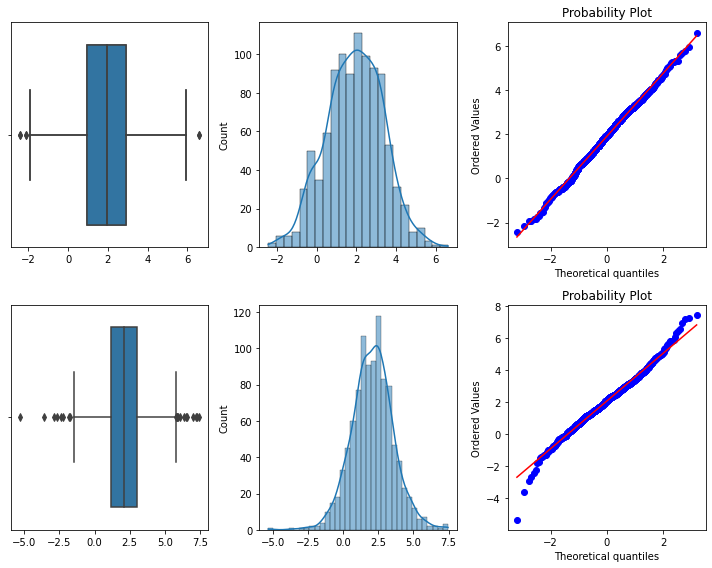

In [68]:
fig

### Appendix: 분위수를 구하는 다양한방법 

In [73]:
m=[i/1000 for i in np.arange(1000)+1]

- $m=\big\{\frac{i}{1000}:  i \in \{1,2,3,\dots,1000\} \big\}=\big\{\frac{1}{1000},\frac{2}{1000},\dots,\frac{1000}{1000} \big\}$

`-` 방법1 

In [74]:
q=[]
for i in range(len(m)):
    q=q+[stats.norm.ppf(m[i])]
q[:5]

[-3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954,
 -2.575829303548901]

`-` 방법2

In [75]:
q=[stats.norm.ppf(m[i]) for i in  range(len(m))]

In [76]:
q[:5]

[-3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954,
 -2.575829303548901]

`-` 방법3 

In [89]:
q=list(map(stats.norm.ppf, m))
q[:5]

[-3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954,
 -2.575829303548901]

`-` 방법4

In [91]:
stats.norm.ppf(m)[:5]

array([-3.09023231, -2.87816174, -2.74778139, -2.65206981, -2.5758293 ])

### Appendix: lambda, map 

#### lambda 

`-` 예제1: 사용방법 

In [105]:
f = lambda x,y,z : x+y+z ## lambda 입력:출력 

In [106]:
f(2,3,4)

9

`-` 예제2: 디폴트입력값

In [107]:
x= (lambda a='fee',b='fie',c='foe': a+b+c) 

In [113]:
x('wee')

'weefiefoe'

`-` 예제3: 람다들의 리스트가능 

In [114]:
l=[lambda x: x**2, lambda x: x**3, lambda x: x**4] 

In [120]:
for f in l: 
    print(f(2))

4
8
16


`-` 예제4: 람다들의 딕셔너리 가능 

In [124]:
dct={'f1': (lambda x: x+1), 'f2': (lambda x: x+22), 'f3': (lambda x: x+333)} 

In [130]:
dct['f1'](1), dct['f2'](1), dct['f3'](1)

(2, 23, 334)

`-` 예제5: 조건부 출력 

(예비학습) 문자열의 대소비교 

In [131]:
'a' < 'b' 

True

In [132]:
'c' < 'b'

False

(예제시작) 

In [133]:
lower = lambda x,y : x if x<y else y

In [138]:
lower('a','b') 

'a'

In [139]:
lower('c','b') 

'b'

`-` 예제6 : lambda expression 을 return력가능 

In [147]:
def action(x):
    return (lambda y: x+y)

In [148]:
act = action(99) ## act는 99+y를 수행하는 함수 
act2 = action(98) ## act2는 99+y를 수행하는 함수 

- action은 마치 함수를 만드는 함수같다.. 

In [149]:
print(act(2))
print(act2(2))

101
100


`-` 예제7: 예제6의 발전 

In [150]:
action = lambda x:  (lambda y: x+y)

In [151]:
act= action(99)
act2=action(98) 

In [152]:
print(act(2))
print(act2(2))

101
100


괄호를 생략하여 선언하면 

In [154]:
action = lambda x: lambda y: x+y 
act= action(99)
act2=action(98) 
print(act(2))
print(act2(2))

101
100


#### map 

`-` 예제1: 사용방법 

In [155]:
def inc(x): return x+1

In [158]:
list(map(inc,[1,2,3,4]))

[2, 3, 4, 5]

`-` 예제1의 변형(람다사용) 

In [160]:
list(map(lambda x: x+1,[1,2,3,4]))

[2, 3, 4, 5]

In [161]:
list(map(def inc(x): return x+1,[1,2,3,4]))

SyntaxError: invalid syntax (3165935467.py, line 1)

- 함수명을 쓰는 자리에 lambda로 표현한 오브젝트 자체를 전달할 수 있다. $\to$ 코드가 간단하다. 

`-` 예제2: map과 리스트컴프리헨션 비교 

(함수선언) 

In [162]:
f = lambda x: 'X' in x 

In [165]:
f('X1'),f('X2'),f('Y1'),f('Y2')

(True, True, False, False)

(map) 

In [167]:
list(map(f,['X1','X2','Y3','Y4']))

[True, True, False, False]

(리스트컴프리헨션과 비교) 

In [168]:
[f(x) for x in ['X1','X2','Y3','Y4']]

[True, True, False, False]

`-` 예제3: 두개의 입력을 받는 함수(pow) map, 리스트컴프리헨션 비교 

(함수소개)

In [170]:
pow(2,4)

16

(map)

In [172]:
list(map(pow,[2,2,2,3,3,3],[0,1,2,0,1,2]))

[1, 2, 4, 1, 3, 9]

(리스트컴프리헨션과 비교)

In [178]:
[pow(x,y) for x,y in zip([2,2,2,3,3,3],[0,1,2,0,1,2])]

[1, 2, 4, 1, 3, 9]

`-` 예제4: map은 (하나의 함수,다양한 입력)인 경우 사용가능 

In [182]:
l=[lambda x: x+1, lambda x: x+2, lambda x: x+3 ] 

In [183]:
list(map(l,[100,200,300]))

TypeError: 'list' object is not callable

리스트컴프리헨션은 (다양한함수,다양한입력)이 가능함 

In [184]:
[l[i](x) for i,x in zip([0,1,2],[100,200,300])]

[101, 202, 303]

`-` **종합: 리스트컴프리헨션과 비교하면 (1) 반복인덱스를 쓰지 않는 장점이 있는 반면 (2) 좀 더 제약적으로 사용할 수밖에 없다는 단점이 있음**

### 애드워드 터프티

`-` 시각화계의 거장 

`-` 터프티의 이론중 백미: 엄격한 미니멀리즘 
- 최소한의 잉크로 많은 정보를 전달할 수 있다면 그것이 바로 좋은 그래프이다. 
- 작은 지면 내에서 잉크를 최대한 적게 써서 짧은 시간 안에 많은 영감을 주어야 한다. 

`-` 데이터-잉크비: 데이터를 표현하는데 들아가는 잉크의 양 / 그래픽을 인쇄하는데 들어가는 잉크의 총량

`-` 차트정크 (나이젤홈즈의 그래프)

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-06-fig1.jpeg?raw=true "그림1: <타임>에 수록된 나이젤홈즈의 작품")

>  “Lurking behind chartjunk is contempt both for information and for the audience. Chartjunk promoters imagine that numbers and details are boring, dull, and tedious, requiring ornament to enliven. Cosmetic decoration, which frequently distorts the data, will never salvage an underlying lack of content. If the numbers are boring, then you’ve got the wrong numbers (...) Worse is contempt for our audience, designing as if readers were obtuse and uncaring. In fact, consumers of graphics are often more intelligent about the information at hand than those who fabricate the data decoration (...) The operating moral premise of information design should be that our readers are alert and caring; they may be busy, eager to get on with it, but they are not stupid.”

- 차트정크 = 대중을 멸시 + 데이터에 대한 모독
- 차트정크 옹호가는 숫자와 데이터가 지루하여 활기가 필요하다고 생각하는 모양이다.. 

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig2.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig3.jpeg?raw=true)

`-` 별로인 그래프 (왼쪽) / 우수한 그래프 오른쪽 

![](https://github.com/guebin/2021DV/blob/master/_notebooks/2021-10-05-fig4.jpeg?raw=true)

`-` 글쎼... 

### 찰스미나드의 도표 (인류역사상 가장 훌륭한 시각화) 

![](https://upload.wikimedia.org/wikipedia/commons/2/29/Minard.png)

`-` 터프티의 평 
- 지금까지 그려진 최고의 통계 그래픽일지도 모른다. 
- 여기에서는 군대의 크기, 2차원 평면상의 위치, 군대의 이동방향, 모스코바에서 퇴각하는 동안의 여러날짜, 온도 $\to$ 6차원의 변수
- 백만번에 한번 이런 그림을 그릴수는 있겠지만 이러한 멋진 그래픽을 만드는 방법에 대한 원칙은 없다. $\to$ 미니멀리즘..

`-` 왜 우수한 그래프일까? 
- 자료를 파악하는 기법은 최근까지도 산점도, 막대그래프, 라인플랏에 의존 
- 이러한 플랏의 단점은 고차원의 자료를 분석하기 어렵다는 것임 
- 미나드는 여러그램을 그리는 방법 대신에 한 그림에서 패널을 늘리는 방법을 선택함. 

### 예제

In [186]:
x=[44,48,49,58,62,68,69,70,76,79] ## 몸무게 
y=[159,160,162,165,167,162,165,175,165,172] ## 키
g= 'f','f','f','f','m','f','m','m','m','m'
df=pd.DataFrame({'w':x,'h':y,'g':g})

In [188]:
df

,w,h,g
0,44,159,f
1,48,160,f
2,49,162,f
3,58,165,f
4,62,167,m
5,68,162,f
6,69,165,m
7,70,175,m
8,76,165,m
9,79,172,m


`-` 미나드의 접근방법 

<AxesSubplot:xlabel='w', ylabel='h'>

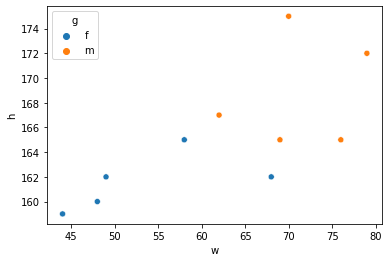

In [189]:
sns.scatterplot(data=df,x='w',y='h',hue='g')

`-` 일반적인 사람들 (보통 색깔을 사용할 생각을 못한다.) 

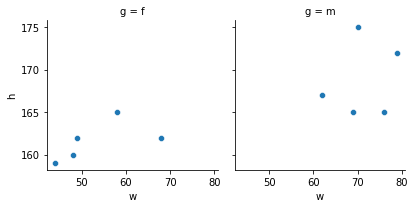

In [192]:
figs = sns.FacetGrid(df,col='g')
figs.map (sns.scatterplot,'w','h') 

`-` 생각보다 데이터가 정리된 형태에 따라서 시각화에 대한 사고방식이 달라진다. 아래와 같은 자료를 받았다고 하자. 

In [195]:
df1=df.query("g =='f'")[['w','h']] ## 여성.csv 
df2=df.query("g =='m'")[['w','h']] ## 남성.csv 

In [197]:
df1

,w,h
4,62,167
6,69,165
7,70,175
8,76,165
9,79,172


In [198]:
df2

,w,h
4,62,167
6,69,165
7,70,175
8,76,165
9,79,172


`-` 데이터프레임을 바꿀 생각을 하는게 쉽지 않다. 

(방법1)

In [201]:
df1['g']= 'f' 

In [202]:
df1

,w,h,g
0,44,159,f
1,48,160,f
2,49,162,f
3,58,165,f
5,68,162,f


In [204]:
df2['g']= 'm'

In [205]:
df2

,w,h,g
4,62,167,m
6,69,165,m
7,70,175,m
8,76,165,m
9,79,172,m


In [206]:
pd.concat([df1,df2])

,w,h,g
0,44,159,f
1,48,160,f
2,49,162,f
3,58,165,f
5,68,162,f
4,62,167,m
6,69,165,m
7,70,175,m
8,76,165,m
9,79,172,m


(방법2)

In [207]:
df1=df.query("g =='f'")[['w','h']] ## 여성.csv 
df2=df.query("g =='m'")[['w','h']] ## 남성.csv 

In [213]:
pd.concat([df1,df2],keys=['f','m']).reset_index().iloc[:,[0,2,3]].rename(columns={'level_0':'g'})

,g,w,h
0,f,44,159
1,f,48,160
2,f,49,162
3,f,58,165
4,f,68,162
5,m,62,167
6,m,69,165
7,m,70,175
8,m,76,165
9,m,79,172


`-` 어려운점: (1) 센스가 없어서 색깔을 넣어서 그룹을 구분할 생각을 못함 (2) 변형해야할 데이터를 생각못함 (3) 데이터를 변형할 생각을 한다고 해도 변형하는 실제적인 코드를 구현할 수 없음 (그래서 엑셀을 킨다..)
- (1) 기획력부족 -> 훌륭한 시각화를 많이 볼것 
- (2) 데이터프레임에 대한 이해도가 부족 -> tidydata에 대한 개념 
- (3) 프로그래밍 능력 부족 -> 코딩공부열심히.. 

`-` 목표: (2) 어떠한 데이터 형태로 변형해야하는가? (3) 그러한 데이터 형태로 바꾸기 위한 pandas 숙련도 

### 숙제

In [223]:
x=np.random.chisquare(df=5, size=100)

<AxesSubplot:ylabel='Count'>

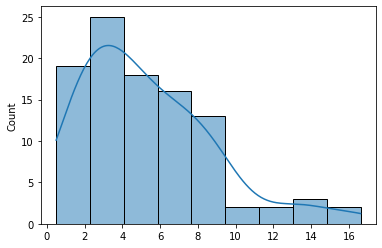

In [224]:
sns.histplot(x,kde=True)

`-` 자유도가5인 카이제곱분포에서 100개의 랜덤변수를 만들고, boxplot / histogram / qqplot 

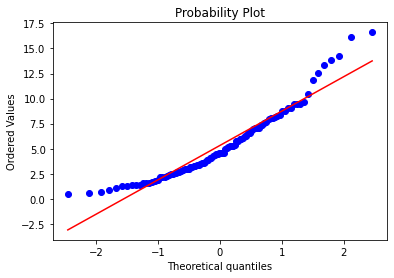

In [225]:
_ = stats.probplot(x,plot=plt)